<a href="https://colab.research.google.com/github/leannmlindsey/portability_local_assembly/blob/main/PortabilityPaperFINALFIGs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
!pip install mplcursors
import mplcursors
import warnings
warnings.filterwarnings('ignore')

# Load Data

In [ ]:
df = pd.read_csv('/content/Raw_data_by_thread.csv')

In [ ]:
df

,platform,kmer_size,kernel_time,integer_operations_by_thread,integer_operations_by_warp,dram_bytes,AI,GIntOP_per_sec
0,NVIDIA,21,0.022,3936830188,1228657034,4765081856,0.258,55.196
1,NVIDIA,33,0.022,4541193966,1192215766,5276132352,0.226,53.728
2,NVIDIA,55,0.032,7814873738,1840612174,7627277824,0.241,57.447
3,NVIDIA,77,0.033,7908139289,1802462187,5887050880,0.306,53.934
4,AMD,21,0.032,18116132672,283064573,6771120448,2.675,573.393
5,AMD,33,0.038,14372476736,224569949,9384099136,1.532,378.223
6,AMD,55,0.068,21724104128,339439127,16996947648,1.278,319.472
7,AMD,77,0.067,23006191360,359471740,16064669376,1.432,343.376
8,INTEL,21,0.027,3331000000,208187500,5140000000,0.648,123.370
9,INTEL,33,0.026,3840000000,240000000,4970000000,0.773,147.692


In [ ]:
df['dram_bytes'] = df['dram_bytes'].astype(int)
df['integer_operations_thread'] = df['integer_operations_by_thread'].astype(int)
df['integer_operations_warp'] = df['integer_operations_by_warp'].astype(int)

In [ ]:
df['IntOP_per_sec' ] = df['integer_operations_thread'] / df['kernel_time']
df['GIntOP_per_sec' ] = df['integer_operations_thread'] / df['kernel_time'] / 1000000000

df['GBytes']=df['dram_bytes']/1000000000

In [ ]:
df

,platform,kmer_size,kernel_time,integer_operations_by_thread,integer_operations_by_warp,dram_bytes,AI,GIntOP_per_sec,integer_operations_thread,integer_operations_warp,IntOP_per_sec,GBytes
0,NVIDIA,21,0.022,3936830188,1228657034,4765081856,0.258,178.946827,3936830188,1228657034,1.789468e+11,4.765082
1,NVIDIA,33,0.022,4541193966,1192215766,5276132352,0.226,206.417908,4541193966,1192215766,2.064179e+11,5.276132
2,NVIDIA,55,0.032,7814873738,1840612174,7627277824,0.241,244.214804,7814873738,1840612174,2.442148e+11,7.627278
3,NVIDIA,77,0.033,7908139289,1802462187,5887050880,0.306,239.640585,7908139289,1802462187,2.396406e+11,5.887051
4,AMD,21,0.032,18116132672,283064573,6771120448,2.675,566.129146,18116132672,283064573,5.661291e+11,6.771120
5,AMD,33,0.038,14372476736,224569949,9384099136,1.532,378.223072,14372476736,224569949,3.782231e+11,9.384099
6,AMD,55,0.068,21724104128,339439127,16996947648,1.278,319.472120,21724104128,339439127,3.194721e+11,16.996948
7,AMD,77,0.067,23006191360,359471740,16064669376,1.432,343.375990,23006191360,359471740,3.433760e+11,16.064669
8,INTEL,21,0.027,3331000000,208187500,5140000000,0.648,123.370370,3331000000,208187500,1.233704e+11,5.140000
9,INTEL,33,0.026,3840000000,240000000,4970000000,0.773,147.692308,3840000000,240000000,1.476923e+11,4.970000


In [ ]:
df_theoretical = pd.read_csv('/content/theoretical_ai.csv')

In [ ]:
df_theoretical.head()

,kmer_size,IntOP_1,IntOP_2,Bytes_1,Bytes_2,AI
0,21,150,150,55,35,3.333
1,33,150,150,79,47,2.381
2,55,150,150,123,69,1.563
3,77,150,150,167,91,1.163


# Kernel Execution Time Comparison

In [ ]:
pivot_df_kt = df.pivot_table(index='kmer_size', columns='platform', values='kernel_time').reset_index()
pivot_df_kt.head()

platform,kmer_size,AMD,INTEL,NVIDIA
0,21,0.032,0.027,0.022
1,33,0.038,0.026,0.022
2,55,0.068,0.022,0.032
3,77,0.067,0.028,0.033


In [ ]:
def plot_kmer_size_bar_chart(data):
    custom_colors = ["#4e79a7", "#f28e2c", "#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab"]
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

    # Create a DataFrame from the data
    df = pd.DataFrame(data)

    # Set the index to kmer_size for plotting
    df.set_index('kmer_size', inplace=True)

    # Plot the data
    df.plot(kind='bar', figsize=(10, 6))

    # Add labels and title
    plt.xlabel('kmer_size')
    plt.ylabel('Execution Time in Seconds')
    plt.title('Kernel Execution Time in Seconds')

    # Display the plot
    plt.show()

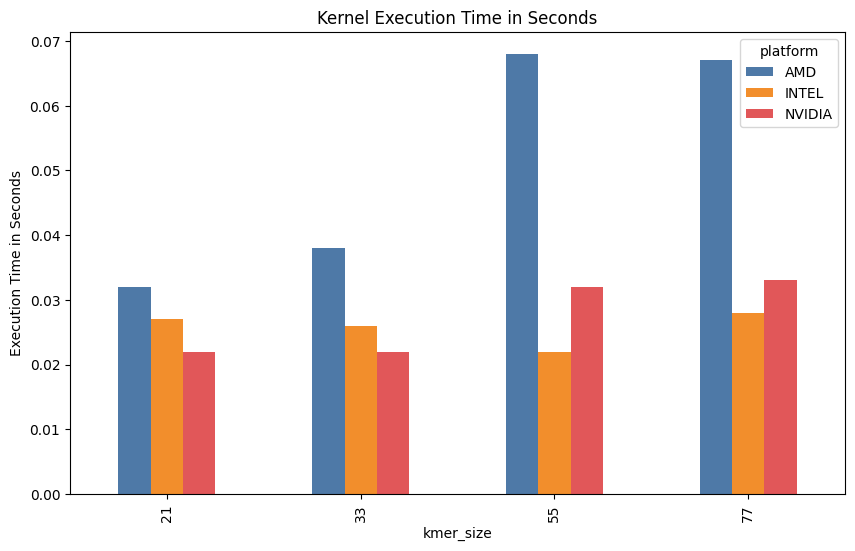

In [ ]:
plot_kmer_size_bar_chart(pivot_df_kt)

# Roofline Plots

In [ ]:
def create_roofline_thread(ax, df, title, peak_flops, peak_mem_bandwidth):
  print(f"Title: {title}")
  # Operational Intensity range
  oi = np.logspace(-3, 3, 100)  # from 0.001 to 1000 IntOPs/byte
  performance_memory_bound = oi * peak_mem_bandwidth
  oi_inflection = peak_flops / peak_mem_bandwidth

  oi_memory = oi[oi <= oi_inflection]
  oi_memory = np.append(oi_memory, oi_inflection)
  performance_memory_bound_filtered = performance_memory_bound[oi <= oi_inflection]
  performance_memory_bound_filtered = np.append(performance_memory_bound_filtered, peak_flops)

  oi_compute = oi[oi >= oi_inflection]
  oi_compute = np.append(oi_inflection, oi_compute)
  performance_compute_bound = np.full_like(oi_compute, peak_flops)

  # Annotate
  #annotation_text = 'HBM GB/s'
  # Choose a point along the memory-bound line for annotation
  #x_annotate = oi_inflection / 1000
  #y_annotate = x_annotate * peak_mem_bandwidth * 1.8

  unique_kmer_sizes = df['kmer_size'].unique()
  hex_colors = ["#4e79a7", "#f28e2c", "#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab"]
  markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'P', '*']

  color_map = {kmer_size: hex_colors[i % len(hex_colors)] for i, kmer_size in enumerate(unique_kmer_sizes)}
  marker_map = {kmer_size: markers[i % len(markers)] for i, kmer_size in enumerate(unique_kmer_sizes)}

  for kmer_size in unique_kmer_sizes:
    subset = df[df['kmer_size'] == kmer_size]
    ax.scatter(subset['AI'], subset['IntOP_per_sec'], c=color_map[kmer_size], marker=marker_map[kmer_size], label=str(kmer_size))
    print(f" kmer: {kmer_size}, AI: {subset['AI'].iloc[0]}, IntOP_per_sec: {subset['IntOP_per_sec'].iloc[0]}")
  # Plotting

  ax.loglog(oi_memory, performance_memory_bound_filtered, linestyle='-', color='black')
  ax.loglog(oi_compute, performance_compute_bound, linestyle='-', color='black')
  ax.plot([oi_inflection, oi_inflection], [1e10, peak_flops], linestyle='--', color='blue', linewidth=1)

  ax.annotate(f'Machine Balance: {oi_inflection:.2f}', xy=(oi_inflection, peak_flops),
                xytext=(oi_inflection * 1.3, 1.5e10),
                fontsize=10, color='blue', ha='center', rotation=90)

  #ax.set_xlim(left=min(oi))
  #ax.set_ylim(bottom=min(performance_memory_bound_filtered))
  ax.set_xlim([1e-2,1e2])
  ax.set_ylim([1e10,1e14])
  ax.set_xlabel('Operational Intensity (IntOPs/byte)')
  ax.set_ylabel('Performance (IntOP/s)')
  ax.set_title(f'{title} Thread-Level Roofline')
  ax.grid(True, which='both', linestyle='--', linewidth=0.5)
  handles = [Line2D([0], [0], marker=marker_map[kmer], color='w', markerfacecolor=color_map[kmer], markersize=8, label=str(kmer))
               for kmer in unique_kmer_sizes]
  ax.legend(title='kmer_size', handles=handles)
  return ax


In [ ]:
def create_roofline_warp(ax, df, title, peak_flops, peak_mem_bandwidth):
  print(f"Title: {title}")
  # Operational Intensity range
  oi = np.logspace(-3, 3, 100)  # from 0.001 to 1000 IntOPs/byte
  performance_memory_bound = oi * peak_mem_bandwidth
  oi_inflection = peak_flops / peak_mem_bandwidth

  oi_memory = oi[oi <= oi_inflection]
  oi_memory = np.append(oi_memory, oi_inflection)
  performance_memory_bound_filtered = performance_memory_bound[oi <= oi_inflection]
  performance_memory_bound_filtered = np.append(performance_memory_bound_filtered, peak_flops)

  oi_compute = oi[oi >= oi_inflection]
  oi_compute = np.append(oi_inflection, oi_compute)
  performance_compute_bound = np.full_like(oi_compute, peak_flops)

  # Annotate
  #annotation_text = 'HBM GB/s'
  # Choose a point along the memory-bound line for annotation
  #x_annotate = oi_inflection / 1000
  #y_annotate = x_annotate * peak_mem_bandwidth * 1.8

  unique_kmer_sizes = df['kmer_size'].unique()
  hex_colors = ["#4e79a7", "#f28e2c", "#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab"]
  markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'P', '*']

  color_map = {kmer_size: hex_colors[i % len(hex_colors)] for i, kmer_size in enumerate(unique_kmer_sizes)}
  marker_map = {kmer_size: markers[i % len(markers)] for i, kmer_size in enumerate(unique_kmer_sizes)}

  for kmer_size in unique_kmer_sizes:
    subset = df[df['kmer_size'] == kmer_size]
    ax.scatter(subset['AI'], subset['IntOP_per_sec'], c=color_map[kmer_size], marker=marker_map[kmer_size], label=str(kmer_size))
    print(f" kmer: {kmer_size}, AI: {subset['AI'].iloc[0]}, IntOP_per_sec: {subset['IntOP_per_sec'].iloc[0]}")
  # Plotting

  ax.loglog(oi_memory, performance_memory_bound_filtered, linestyle='-', color='black')
  ax.loglog(oi_compute, performance_compute_bound, linestyle='-', color='black')
  ax.plot([oi_inflection, oi_inflection], [1e8, peak_flops], linestyle='--', color='blue', linewidth=1)

  ax.annotate(f'Machine Balance: {oi_inflection:.2f}', xy=(oi_inflection, peak_flops),
                xytext=(oi_inflection * 1.5, 1.5e9),
                fontsize=10, color='blue', ha='center', rotation=90)

  #ax.set_xlim(left=min(oi))
  #ax.set_ylim(bottom=min(performance_memory_bound_filtered))
  ax.set_xlim([1e-3,1e3])
  ax.set_ylim([1e9,1e12])
  ax.set_xlabel('Operational Intensity (IntOPs/byte)')
  ax.set_ylabel('Performance (IntOP/s)')
  ax.set_title(f'{title} Warp-Level Roofline')
  ax.grid(True, which='both', linestyle='--', linewidth=0.5)
  handles = [Line2D([0], [0], marker=marker_map[kmer], color='w', markerfacecolor=color_map[kmer], markersize=8, label=str(kmer))
               for kmer in unique_kmer_sizes]
  ax.legend(title='kmer_size', handles=handles)
  return ax

Title: NVIDIA
 kmer: 21, AI: 0.258, IntOP_per_sec: 178946826727.27274
 kmer: 33, AI: 0.226, IntOP_per_sec: 206417907545.45456
 kmer: 55, AI: 0.241, IntOP_per_sec: 244214804312.5
 kmer: 77, AI: 0.306, IntOP_per_sec: 239640584515.1515
Title: AMD
 kmer: 21, AI: 2.675, IntOP_per_sec: 566129146000.0
 kmer: 33, AI: 1.532, IntOP_per_sec: 378223072000.0
 kmer: 55, AI: 1.278, IntOP_per_sec: 319472119529.41174
 kmer: 77, AI: 1.432, IntOP_per_sec: 343375990447.76117
Title: INTEL
 kmer: 21, AI: 0.648, IntOP_per_sec: 123370370370.37038
 kmer: 33, AI: 0.773, IntOP_per_sec: 147692307692.3077
 kmer: 55, AI: 1.386, IntOP_per_sec: 307818181818.1818
 kmer: 77, AI: 3.008, IntOP_per_sec: 269678571428.5714


<Axes: title={'center': 'INTEL Thread-Level Roofline'}, xlabel='Operational Intensity (IntOPs/byte)', ylabel='Performance (IntOP/s)'>

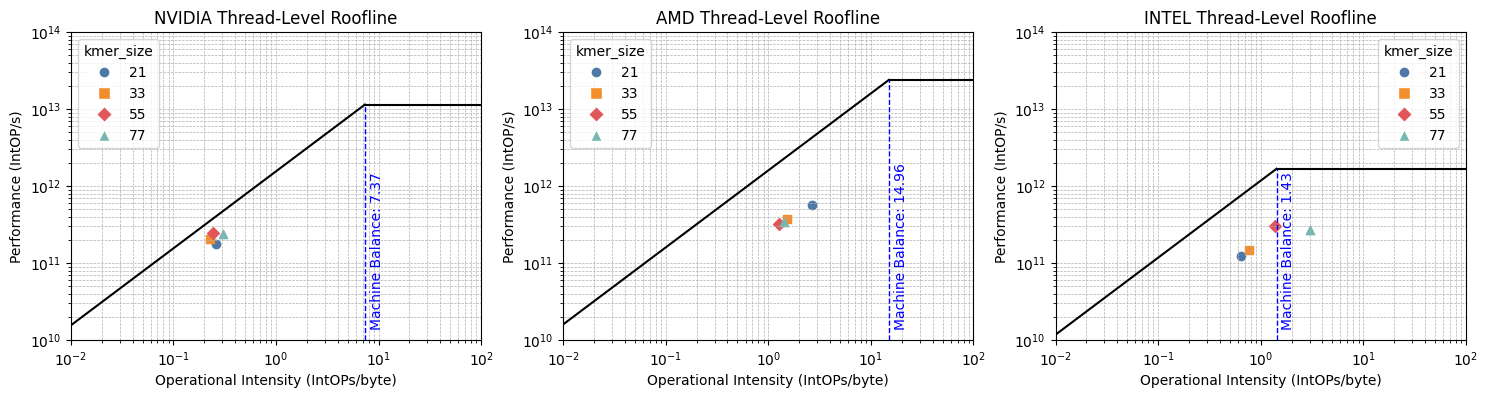

In [ ]:
# NVIDIA A100 Values
peak_iops_nvidia = 358*32*1e9  # Calculation by Nan Ding: 128 SM * 4 Warp scheduler * (16 INT32 cores/ 32 threads) * 1.4GHz =  358 GIPS
peak_mem_bandwidth_nvidia = 1555*1e9 # Memory Bandwidth 1555 GB/sec

# AMD Values
# peak_mem_bandwidth values taken from: https://www.techpowerup.com/gpu-specs/radeon-instinct-mi250x.c3837
peak_iops_amd = 374*64*1e9  # Calculation by Nan Ding: 220 CU * 1 warp scheduler * 1 instruction * 1.7 GHz = 374 GIPS
#peak_mem_bandwidth_amd = 3.28*1e10 # Memory Bandwidth 3.28 TB/s
peak_mem_bandwidth_amd = 1.6*1e12 # Memory Bandwidth 1.6 TB/s Nan's instructions

# INTEL Values
peak_iops_intel = 1680*1e9  # Int32 Vector Add Peak: 1.68e4 GINTOPS (from Intel Advisor Roofline Plots)
peak_mem_bandwidth_intel = 1176.21*1e9 # HBM Bandwidth reported on Intel Advisor screenshot from Muaaz


nvidia = df[df['platform'] == 'NVIDIA']
subset_nvidia = nvidia.loc[:, ['kmer_size', 'integer_operations_thread', 'kernel_time', 'AI']]
subset_nvidia['IntOP_per_sec'] = subset_nvidia['integer_operations_thread'] / subset_nvidia['kernel_time']

amd = df[df['platform'] == 'AMD']
subset_amd = amd.loc[:, ['kmer_size', 'integer_operations_thread', 'kernel_time', 'AI']]
subset_amd['IntOP_per_sec'] = subset_amd['integer_operations_thread'] / subset_amd['kernel_time']

intel = df[df['platform'] == 'INTEL']
subset_intel = intel.loc[:, ['kmer_size', 'integer_operations_thread', 'kernel_time', 'AI']]
subset_intel['IntOP_per_sec'] = subset_intel['integer_operations_thread'] / subset_intel['kernel_time']

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

create_roofline_thread(axes[0], subset_nvidia, 'NVIDIA', peak_iops_nvidia, peak_mem_bandwidth_nvidia)
create_roofline_thread(axes[1], subset_amd, 'AMD', peak_iops_amd, peak_mem_bandwidth_amd)
create_roofline_thread(axes[2], subset_intel, 'INTEL', peak_iops_intel, peak_mem_bandwidth_intel)


Title: NVIDIA
 kmer: 21, AI: 0.258, IntOP_per_sec: 55848047000.0
 kmer: 33, AI: 0.226, IntOP_per_sec: 54191625727.27273
 kmer: 55, AI: 0.241, IntOP_per_sec: 57519130437.5
 kmer: 77, AI: 0.306, IntOP_per_sec: 54620066272.72727
Title: AMD
 kmer: 21, AI: 2.675, IntOP_per_sec: 8845767906.25
 kmer: 33, AI: 1.532, IntOP_per_sec: 5909735500.0
 kmer: 55, AI: 1.278, IntOP_per_sec: 4991751867.6470585
 kmer: 77, AI: 1.432, IntOP_per_sec: 5365249850.746268
Title: INTEL
 kmer: 21, AI: 0.648, IntOP_per_sec: 7710648148.148149
 kmer: 33, AI: 0.773, IntOP_per_sec: 9230769230.769232
 kmer: 55, AI: 1.386, IntOP_per_sec: 19238636363.636364
 kmer: 77, AI: 3.008, IntOP_per_sec: 16854910714.285713


<Axes: title={'center': 'INTEL Warp-Level Roofline'}, xlabel='Operational Intensity (IntOPs/byte)', ylabel='Performance (IntOP/s)'>

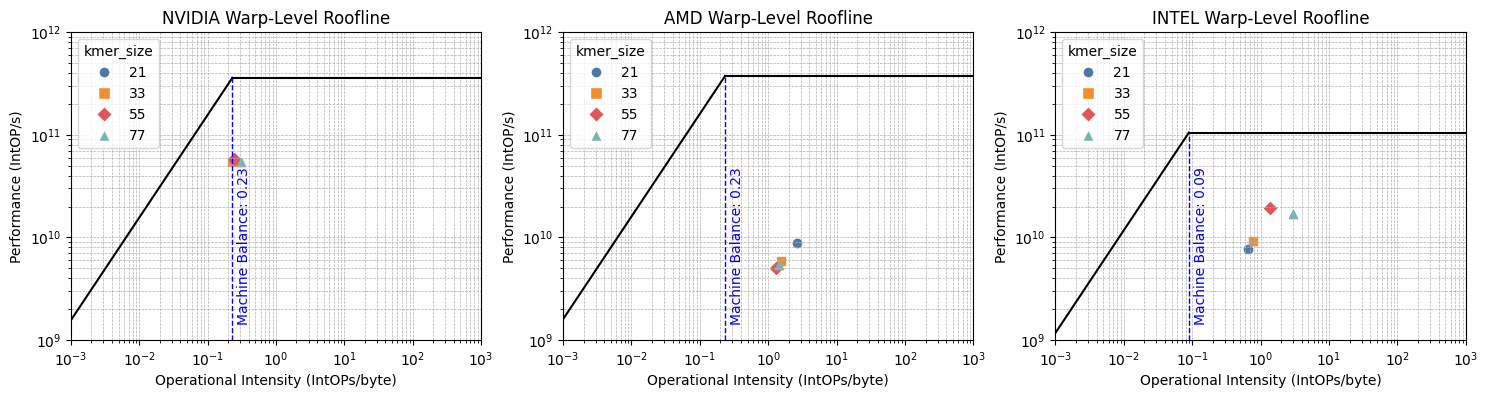

In [ ]:
# NVIDIA A100 Values
peak_iops_nvidia = 358*1e9  # Calculation by Nan Ding: 128 SM * 4 Warp scheduler * (16 INT32 cores/ 32 threads) * 1.4GHz =  358 GIPS
peak_mem_bandwidth_nvidia = 1555*1e9 # Memory Bandwidth 1555 GB/sec

# AMD Values
# peak_mem_bandwidth values taken from: https://www.techpowerup.com/gpu-specs/radeon-instinct-mi250x.c3837
peak_iops_amd = 374*1e9  # Calculation by Nan Ding: 220 CU * 1 warp scheduler * 1 instruction * 1.7 GHz = 374 GIPS
#peak_mem_bandwidth_amd = 3.28*1e10 # Memory Bandwidth 3.28 TB/s
peak_mem_bandwidth_amd = 1.6*1e12 # Memory Bandwidth 1.6 TB/s Nan's instructions

# INTEL Values
peak_iops_intel = (1680/16)*1e9  # Int32 Vector Add Peak: 1.68e4 GINTOPS (from Intel Advisor Roofline Plots)
peak_mem_bandwidth_intel = 1176.21*1e9 # HBM Bandwidth reported on Intel Advisor screenshot from Muaaz


nvidia = df[df['platform'] == 'NVIDIA']
subset_nvidia = nvidia.loc[:, ['kmer_size', 'integer_operations_warp', 'kernel_time', 'AI']]
subset_nvidia['IntOP_per_sec'] = subset_nvidia['integer_operations_warp'] / subset_nvidia['kernel_time']

amd = df[df['platform'] == 'AMD']
subset_amd = amd.loc[:, ['kmer_size', 'integer_operations_warp', 'kernel_time', 'AI']]
subset_amd['IntOP_per_sec'] = subset_amd['integer_operations_warp'] / subset_amd['kernel_time']

intel = df[df['platform'] == 'INTEL']
subset_intel = intel.loc[:, ['kmer_size', 'integer_operations_warp', 'kernel_time', 'AI']]
subset_intel['IntOP_per_sec'] = subset_intel['integer_operations_warp'] / subset_intel['kernel_time']

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

create_roofline_warp(axes[0], subset_nvidia, 'NVIDIA', peak_iops_nvidia, peak_mem_bandwidth_nvidia)
create_roofline_warp(axes[1], subset_amd, 'AMD', peak_iops_amd, peak_mem_bandwidth_amd)
create_roofline_warp(axes[2], subset_intel, 'INTEL', peak_iops_intel, peak_mem_bandwidth_intel)

# Performance Portability Metric P based on fraction of theoretical arithmetic intensity

This metric is comparing a kernel's performance to the maximum performance based on the particular algorithm

In [ ]:
smaller_df = df.loc[:, ['platform', 'AI']]
smaller_df

,platform,AI
0,NVIDIA,0.258
1,NVIDIA,0.226
2,NVIDIA,0.241
3,NVIDIA,0.306
4,AMD,2.675
5,AMD,1.532
6,AMD,1.278
7,AMD,1.432
8,INTEL,0.648
9,INTEL,0.773


In [ ]:
pivot_df_ai = df.pivot_table(index='kmer_size', columns='platform', values='AI').reset_index()
pivot_df_ai.head()

platform,kmer_size,AMD,INTEL,NVIDIA
0,21,2.675,0.648,0.258
1,33,1.532,0.773,0.226
2,55,1.278,1.386,0.241
3,77,1.432,3.008,0.306


In [ ]:
df_theoretical.head()

,kmer_size,IntOP_1,IntOP_2,Bytes_1,Bytes_2,AI
0,21,150,150,55,35,3.333
1,33,150,150,79,47,2.381
2,55,150,150,123,69,1.563
3,77,150,150,167,91,1.163


In [ ]:
P_ai = df.pivot_table(index='kmer_size', columns='platform', values='AI').reset_index()


In [ ]:

P_ai['INTEL'] = pivot_df_ai['INTEL']/df_theoretical['AI']
P_ai['AMD'] = pivot_df_ai['AMD']/df_theoretical['AI']
P_ai['NVIDIA'] = pivot_df_ai['NVIDIA']/df_theoretical['AI']
P_ai.head()

platform,kmer_size,AMD,INTEL,NVIDIA
0,21,0.802580,0.194419,0.077408
1,33,0.643427,0.324654,0.094918
2,55,0.817658,0.886756,0.154191
3,77,1.231298,2.586414,0.263113


In [ ]:
P_ai['average'] = (P_ai['INTEL'] + P_ai['AMD'] + P_ai['NVIDIA'])/3
P_ai.head()

platform,kmer_size,AMD,INTEL,NVIDIA,average
0,21,0.802580,0.194419,0.077408,0.358136
1,33,0.643427,0.324654,0.094918,0.354333
2,55,0.817658,0.886756,0.154191,0.619535
3,77,1.231298,2.586414,0.263113,1.360275


# Performance Portability Metric based on fraction of Roofline

This metric is comparing a kernel's performance to the maximum performance on a particular machine.

In [ ]:
pivot_df_GIntOPS = df.pivot_table(index='kmer_size', columns='platform', values='GIntOP_per_sec').reset_index()
pivot_df_GIntOPS

platform,kmer_size,AMD,INTEL,NVIDIA
0,21,566.129146,123.370370,178.946827
1,33,378.223072,147.692308,206.417908
2,55,319.472120,307.818182,244.214804
3,77,343.375990,269.678571,239.640585


In [ ]:
machine_peak_iops = {'INTEL': peak_iops_intel/1e9, 'AMD': peak_iops_amd/1e9, 'NVIDIA': peak_iops_nvidia/1e9}
print(machine_peak_iops)

{'INTEL': 105.0, 'AMD': 374.0, 'NVIDIA': 358.0}


In [ ]:
P_roofline = df.pivot_table(index='kmer_size', columns='platform', values='GIntOP_per_sec').reset_index()

In [ ]:
P_roofline['INTEL'] = pivot_df_GIntOPS['INTEL']/machine_peak_iops['INTEL']
P_roofline['AMD'] = pivot_df_GIntOPS['AMD']/machine_peak_iops['AMD']
P_roofline['NVIDIA'] = pivot_df_GIntOPS['NVIDIA']/machine_peak_iops['NVIDIA']
P_roofline.head()

platform,kmer_size,AMD,INTEL,NVIDIA
0,21,1.513714,1.174956,0.499851
1,33,1.011292,1.406593,0.576586
2,55,0.854204,2.931602,0.682164
3,77,0.918118,2.568367,0.669387


In [ ]:
P_roofline['average'] = (P_roofline['INTEL'] + P_roofline['AMD'] + P_roofline['NVIDIA'])/3
P_roofline.head()

platform,kmer_size,AMD,INTEL,NVIDIA,average
0,21,1.513714,1.174956,0.499851,1.062841
1,33,1.011292,1.406593,0.576586,0.998157
2,55,0.854204,2.931602,0.682164,1.489323
3,77,0.918118,2.568367,0.669387,1.385291


# Performance Correlation

In [ ]:
smaller_df = df.loc[:, ['platform', 'GIntOP_per_sec']]
smaller_df

,platform,GIntOP_per_sec
0,NVIDIA,178.946827
1,NVIDIA,206.417908
2,NVIDIA,244.214804
3,NVIDIA,239.640585
4,AMD,566.129146
5,AMD,378.223072
6,AMD,319.472120
7,AMD,343.375990
8,INTEL,123.370370
9,INTEL,147.692308


In [ ]:
def plot_log_log_comparison(ax, df, platform_x, platform_y, xlabel, ylabel, title, range_min, range_max):
    # Define Color Map
    unique_kmer_sizes = df['kmer_size'].unique()
    hex_colors = ["#4e79a7", "#f28e2c", "#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab"]
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'P', '*']

    color_map = {kmer_size: hex_colors[i % len(hex_colors)] for i, kmer_size in enumerate(unique_kmer_sizes)}
    marker_map = {kmer_size: markers[i % len(markers)] for i, kmer_size in enumerate(unique_kmer_sizes)}

    for kmer_size in unique_kmer_sizes:
        subset = df[df['kmer_size'] == kmer_size]
        ax.scatter(subset[platform_x], subset[platform_y], c=color_map[kmer_size], marker=marker_map[kmer_size], label=str(kmer_size))

    ax.set_xscale('log', base=10)
    ax.set_yscale('log', base=10)
    ax.set_xlim([range_min, range_max])
    ax.set_ylim([range_min, range_max])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Add a diagonal line
    ax.plot([range_min, range_max], [range_min, range_max], color='#76b7b2', linestyle='--')

    ax.grid(True, which="both", ls="--")

    # Create legend with both markers and colors
    handles = [Line2D([0], [0], marker=marker_map[kmer], color='w', markerfacecolor=color_map[kmer], markersize=8, label=str(kmer))
               for kmer in unique_kmer_sizes]
    ax.legend(title='kmer_size', handles=handles)

    return ax




In [ ]:
pivoted_df = df.pivot_table(index='kmer_size', columns='platform', values='GIntOP_per_sec').reset_index()
print(pivoted_df)

platform  kmer_size         AMD       INTEL      NVIDIA
0                21  566.129146  123.370370  178.946827
1                33  378.223072  147.692308  206.417908
2                55  319.472120  307.818182  244.214804
3                77  343.375990  269.678571  239.640585


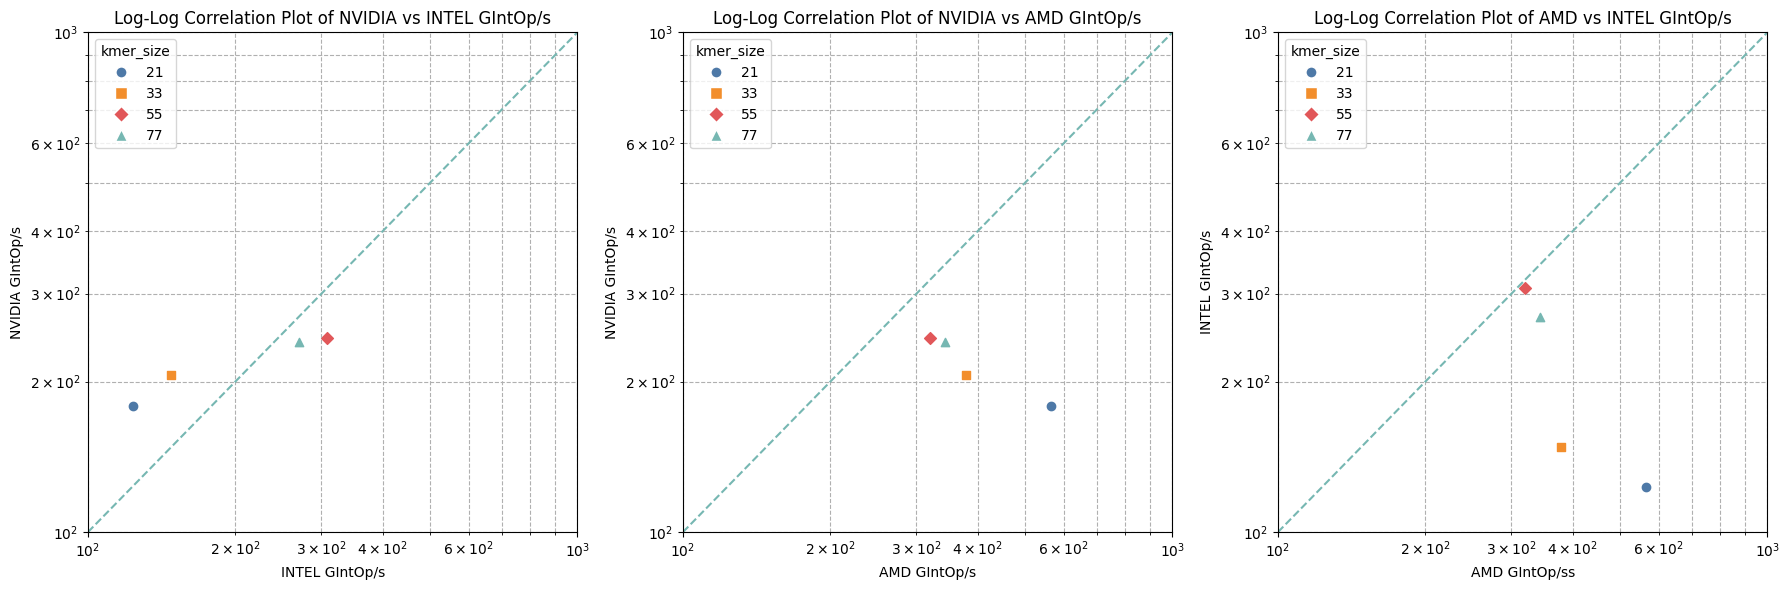

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
from matplotlib.ticker import StrMethodFormatter
scatter1 = plot_log_log_comparison(axes[0], pivoted_df, 'INTEL', 'NVIDIA', 'INTEL GIntOp/s', 'NVIDIA GIntOp/s', 'Log-Log Correlation Plot of NVIDIA vs INTEL GIntOp/s', 100, 1000)
scatter2 = plot_log_log_comparison(axes[1], pivoted_df, 'AMD', 'NVIDIA', 'AMD GIntOp/s', 'NVIDIA GIntOp/s', 'Log-Log Correlation Plot of NVIDIA vs AMD GIntOp/s', 100, 1000)
scatter3 = plot_log_log_comparison(axes[2], pivoted_df, 'AMD', 'INTEL', 'AMD GIntOp/ss', 'INTEL GIntOp/s', 'Log-Log Correlation Plot of AMD vs INTEL GIntOp/s', 100, 1000)

plt.tight_layout()

plt.savefig('/content/log_log_GIntOp_per_sec_comparison_plots.svg', format='svg')
plt.savefig('/content/log_log_GIntOp_per_sec_comparison_plots.jpg', format='jpg')

plt.show()

# Bytes Correlation

In [ ]:
smaller_df = df.loc[:, ['platform', 'GBytes']]
smaller_df

,platform,GBytes
0,NVIDIA,4.765082
1,NVIDIA,5.276132
2,NVIDIA,7.627278
3,NVIDIA,5.887051
4,AMD,6.771120
5,AMD,9.384099
6,AMD,16.996948
7,AMD,16.064669
8,INTEL,5.140000
9,INTEL,4.970000


In [ ]:
pivoted_df = df.pivot_table(index='kmer_size', columns='platform', values='GBytes').reset_index()
print(pivoted_df)

platform  kmer_size        AMD  INTEL    NVIDIA
0                21   6.771120  5.140  4.765082
1                33   9.384099  4.970  5.276132
2                55  16.996948  4.886  7.627278
3                77  16.064669  2.510  5.887051


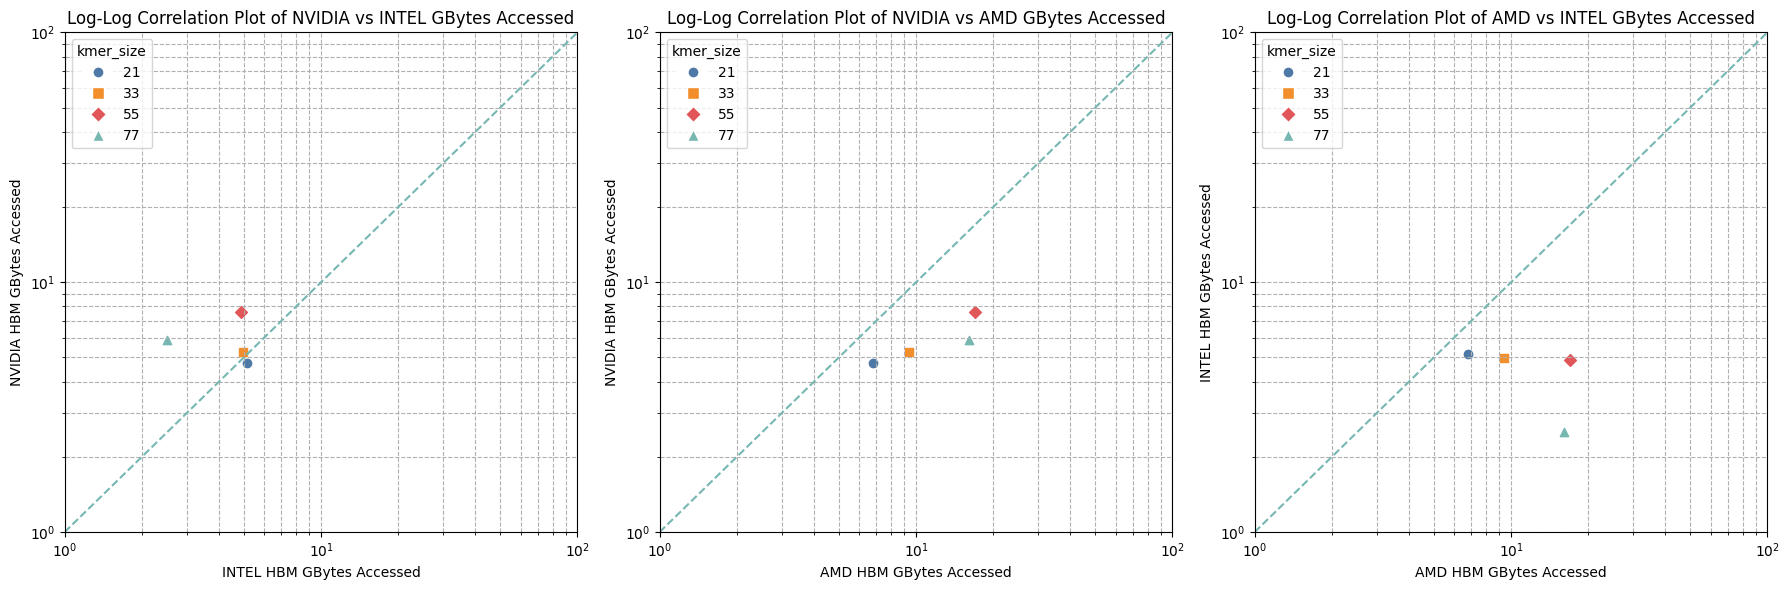

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

scatter1 = plot_log_log_comparison(axes[0], pivoted_df, 'INTEL', 'NVIDIA', 'INTEL HBM GBytes Accessed', 'NVIDIA HBM GBytes Accessed', 'Log-Log Correlation Plot of NVIDIA vs INTEL GBytes Accessed', 1, 100)
scatter2 = plot_log_log_comparison(axes[1], pivoted_df, 'AMD', 'NVIDIA', 'AMD HBM GBytes Accessed', 'NVIDIA HBM GBytes Accessed', 'Log-Log Correlation Plot of NVIDIA vs AMD GBytes Accessed', 1, 100)
scatter3 = plot_log_log_comparison(axes[2], pivoted_df, 'AMD', 'INTEL', 'AMD HBM GBytes Accessed', 'INTEL HBM GBytes Accessed', 'Log-Log Correlation Plot of AMD vs INTEL GBytes Accessed', 1, 100)

plt.tight_layout()

plt.savefig('/content/log_log_GBytes_comparison_plots.svg', format='svg')
plt.savefig('/content/log_log_GBytes_comparison_plots.jpg', format='jpg')

plt.show()

# Potential Speed-up Plot

In [ ]:
def speed_up_plot(ax, df):
    # Define Color Map
    unique_kmer_sizes = df['kmer_size'].unique()
    unique_platforms = df['platform'].unique()
    hex_colors = ["#4e79a7", "#f28e2c", "#e15759", "#76b7b2", "#59a14f", "#edc949", "#af7aa1", "#ff9da7", "#9c755f", "#bab0ab"]
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'P', '*']

    color_map = {platform: hex_colors[i % len(hex_colors)] for i, platform in enumerate(unique_platforms)}
    marker_map = {kmer_size: markers[i % len(markers)] for i, kmer_size in enumerate(unique_kmer_sizes)}

    for platform in unique_platforms:
      for kmer_size in unique_kmer_sizes:
        subset = df[df['platform'] == platform]
        print(subset['AI'])
        print(subset['Roofline'])
        ax.scatter(subset['AI'], subset['Roofline'], c=color_map[platform], marker=marker_map[kmer_size], label=str(kmer_size))

    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    ax.set_xlabel("% Theoretical AI")
    ax.set_ylabel("% Roofline")
    ax.set_title("Potential Speed Up Plot")


    # Create legend with both markers and colors
    handles = [Line2D([0], [0], marker=marker_map[kmer], color='w', markerfacecolor='black', markersize=8, label=str(kmer))
               for kmer in unique_kmer_sizes]
    ax.legend(title='kmer_size', handles=handles)

    return ax

In [ ]:
P_ai

platform,kmer_size,AMD,INTEL,NVIDIA,average
0,21,0.802580,0.194419,0.077408,0.358136
1,33,0.643427,0.324654,0.094918,0.354333
2,55,0.817658,0.886756,0.154191,0.619535
3,77,1.231298,2.586414,0.263113,1.360275


In [ ]:
P_roofline

platform,kmer_size,AMD,INTEL,NVIDIA,average
0,21,1.513714,1.174956,0.499851,1.062841
1,33,1.011292,1.406593,0.576586,0.998157
2,55,0.854204,2.931602,0.682164,1.489323
3,77,0.918118,2.568367,0.669387,1.385291


In [ ]:
ai = P_ai.melt(id_vars=['kmer_size'], value_vars=['INTEL', 'AMD', 'NVIDIA'])
ai

,kmer_size,platform,value
0,21,INTEL,0.194419
1,33,INTEL,0.324654
2,55,INTEL,0.886756
3,77,INTEL,2.586414
4,21,AMD,0.802580
5,33,AMD,0.643427
6,55,AMD,0.817658
7,77,AMD,1.231298
8,21,NVIDIA,0.077408
9,33,NVIDIA,0.094918


In [ ]:
ai = ai.rename(columns={'value': 'AI'})

In [ ]:
roofline = P_roofline.melt(id_vars=['kmer_size'], value_vars=['INTEL', 'AMD', 'NVIDIA'])
roofline

,kmer_size,platform,value
0,21,INTEL,1.174956
1,33,INTEL,1.406593
2,55,INTEL,2.931602
3,77,INTEL,2.568367
4,21,AMD,1.513714
5,33,AMD,1.011292
6,55,AMD,0.854204
7,77,AMD,0.918118
8,21,NVIDIA,0.499851
9,33,NVIDIA,0.576586


In [ ]:
roofline = roofline.rename(columns={'value': 'Roofline'})
roofline

,kmer_size,platform,Roofline
0,21,INTEL,1.174956
1,33,INTEL,1.406593
2,55,INTEL,2.931602
3,77,INTEL,2.568367
4,21,AMD,1.513714
5,33,AMD,1.011292
6,55,AMD,0.854204
7,77,AMD,0.918118
8,21,NVIDIA,0.499851
9,33,NVIDIA,0.576586


In [ ]:
ai['Roofline'] = roofline['Roofline']

In [ ]:
ai

,kmer_size,platform,AI,Roofline
0,21,INTEL,0.194419,1.174956
1,33,INTEL,0.324654,1.406593
2,55,INTEL,0.886756,2.931602
3,77,INTEL,2.586414,2.568367
4,21,AMD,0.802580,1.513714
5,33,AMD,0.643427,1.011292
6,55,AMD,0.817658,0.854204
7,77,AMD,1.231298,0.918118
8,21,NVIDIA,0.077408,0.499851
9,33,NVIDIA,0.094918,0.576586


0    0.194419
1    0.324654
2    0.886756
3    2.586414
Name: AI, dtype: float64
0    1.174956
1    1.406593
2    2.931602
3    2.568367
Name: Roofline, dtype: float64
0    0.194419
1    0.324654
2    0.886756
3    2.586414
Name: AI, dtype: float64
0    1.174956
1    1.406593
2    2.931602
3    2.568367
Name: Roofline, dtype: float64
0    0.194419
1    0.324654
2    0.886756
3    2.586414
Name: AI, dtype: float64
0    1.174956
1    1.406593
2    2.931602
3    2.568367
Name: Roofline, dtype: float64
0    0.194419
1    0.324654
2    0.886756
3    2.586414
Name: AI, dtype: float64
0    1.174956
1    1.406593
2    2.931602
3    2.568367
Name: Roofline, dtype: float64
4    0.802580
5    0.643427
6    0.817658
7    1.231298
Name: AI, dtype: float64
4    1.513714
5    1.011292
6    0.854204
7    0.918118
Name: Roofline, dtype: float64
4    0.802580
5    0.643427
6    0.817658
7    1.231298
Name: AI, dtype: float64
4    1.513714
5    1.011292
6    0.854204
7    0.918118
Name: Roofline, dtype: 

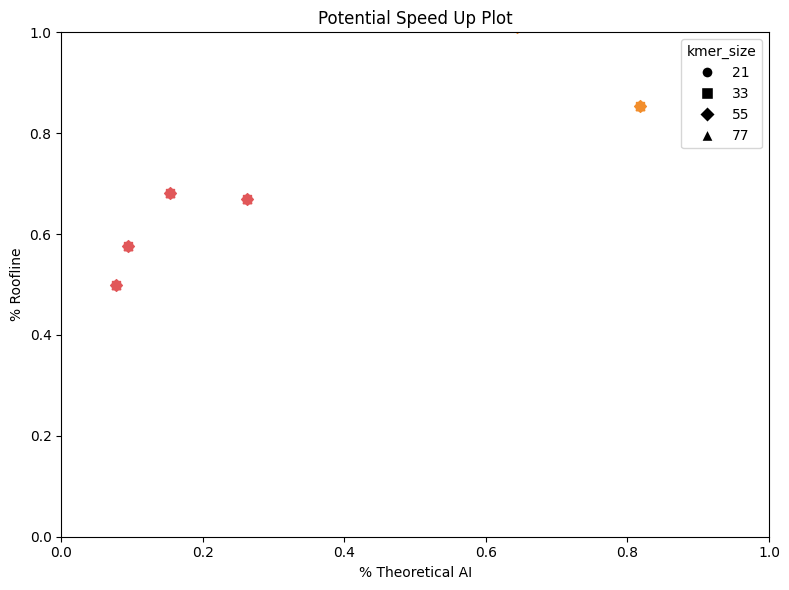

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

scatter1 = speed_up_plot(ax, ai)
plt.tight_layout()

plt.show()
